# `matplotlib`

Rozsáhlá grafická knihovna určená pro tvorbu statických, animovaných či interaktivních vizualizací. My se zde omezíme pouze na podbalík `pyplot`, který slouží k tvorbě jednoduchých statických grafů.

```{warning}
Dokumentace k `matplotlib` není vždy zrovna nejčitelnější. Pokud se Vám podaří konečně podaří něco náročnějšího nastavit, pečlivě si to uschovejte, ať to za dva měsíce nemusíte celé procházet znovu. 
```

Základní použití pomocí funkce `plot`.

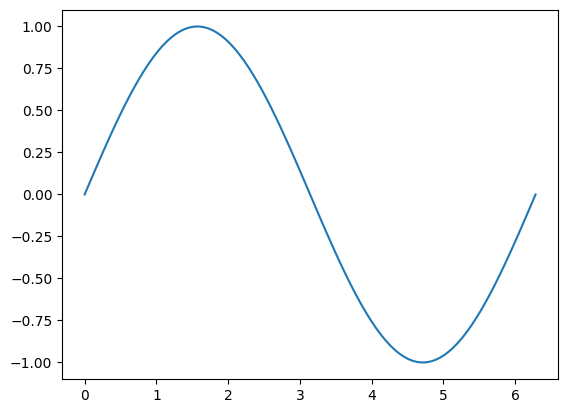

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 2*np.pi, 100) # pole 100 hodnot od 0 do 2 pi, 
y = np.sin(x) # pole hodnot funkce sin(x) pro cisla z pole x

plt.plot(x, y)
plt.show()

Samotná funkce `plot` má celou řadu nastavení, viz [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot), která ovlivňují vzhled kreslených dat. Celkové vzezření grafu lze ovlivnit voláním funkcí přímo z balíku `pyplot`. Např:

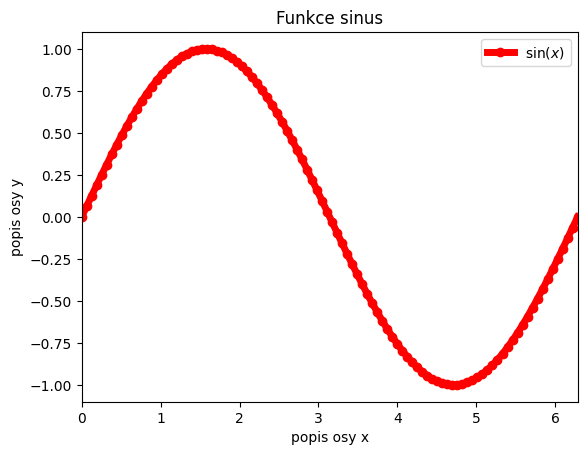

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y, "ro-", lw = 5.0, label="$\sin(x)$")
plt.title("Funkce sinus")
plt.xlabel("popis osy x")
plt.ylabel("popis osy y")
plt.ylim(-1.1, 1.1)
plt.xlim(0.0, 2*np.pi)
plt.legend()
plt.show()

## `figure` a `axes`

`matplotlib` celkem skrytě pracuje s konceptem dvou objektů: `figure` a `axes`. `figure` je celkový obrázek, který matplotlib vyprodukuje, zatímco `axes` jsou sada os, vůči kterým graf zakreslujeme. Jeden `figure` může obsahovat více `axes`, ale obráceně ne.

Existuje mnoho způsobů, jak tyto objekty vytvořit, v příkladech níže jsou dva nejpoužívanější.

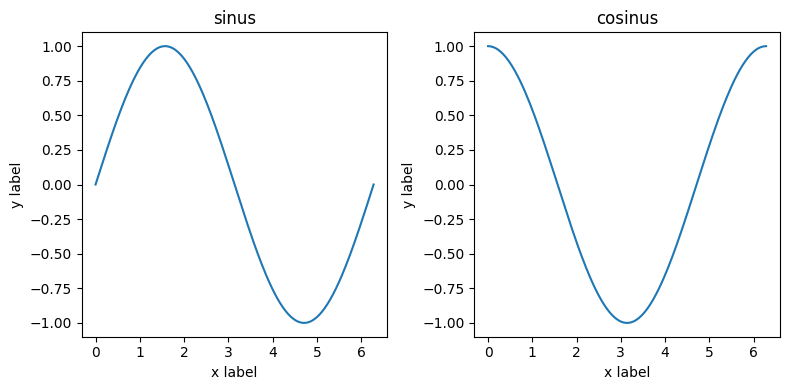

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 200)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(x, np.sin(x))
axs[0].set_xlabel("x label")
axs[0].set_ylabel("y label")
axs[0].set_title("sinus")

axs[1].plot(x, np.cos(x))
axs[1].set_xlabel("x label")
axs[1].set_ylabel("y label")
axs[1].set_title("cosinus")

fig.tight_layout()

plt.show()

Pozor na návratový typ funkce `plt.subplots` - závisí na počtu `axes`:

- `fig, axs = plt.subplots(1, 1)` - axs je typu `Axes`
- `fig, axs = plt.subplots(1, 2)` - axs je `numpy.ndarray` obsahující `Axes`
- `fig, axs = plt.subplots(2, 2)` - axs je 2D `numpy.ndarray` obsahující `Axes`

Všimněte si také, že pokud přidáváte popisky apod. přes objekt `Axes`, mají metody prefix `set_`

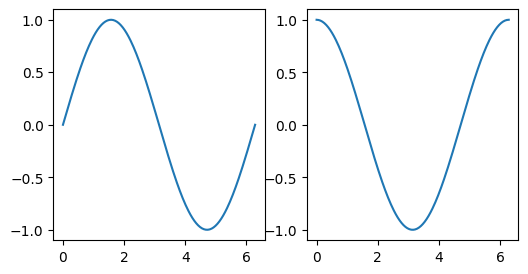

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)

fig = plt.figure(figsize=(6, 3))

ax = fig.add_subplot(121) # 121 značí 1 řádek, 2 sloupce, 1. z možných grafů
ax.plot(x, np.sin(x))

ax = fig.add_subplot(122) # 122 značí 1 řádek, 2 sloupce, 2. z možných grafů
ax.plot(x, np.cos(x))

plt.show()

## Colormaps

Z pohledu knihovny `matplotlib` je colormap něco, co umí převádí čísla z intervalu $[0, 1]$ na barvy formát RGBA, které reprezentuje. V matplotlibu je k disposici velké množství barevných map. Typické použité může vypadat takto:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap("viridis")
cmap(0.5, alpha=0.8)

(0.127568, 0.566949, 0.550556, 0.8)

In [6]:
cmap(np.linspace(0, 1, 5), alpha=np.linspace(0, 1, 5))

array([[0.267004, 0.004874, 0.329415, 0.      ],
       [0.229739, 0.322361, 0.545706, 0.25    ],
       [0.127568, 0.566949, 0.550556, 0.5     ],
       [0.369214, 0.788888, 0.382914, 0.75    ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

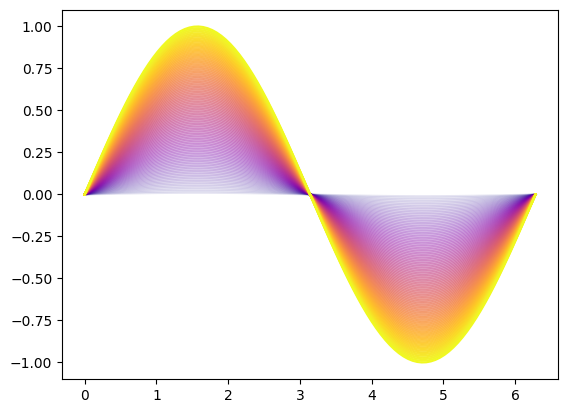

In [7]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.linspace(0, 2 * np.pi, 100)
cmap = plt.get_cmap("plasma")
colors = cmap(np.linspace(0, 1, N), alpha=np.linspace(0.1, 1, N))

for i in range(N):
    plt.plot(x, (i+1)*np.sin(x) / N, color=colors[i])
plt.show()

### Vlastní mapy

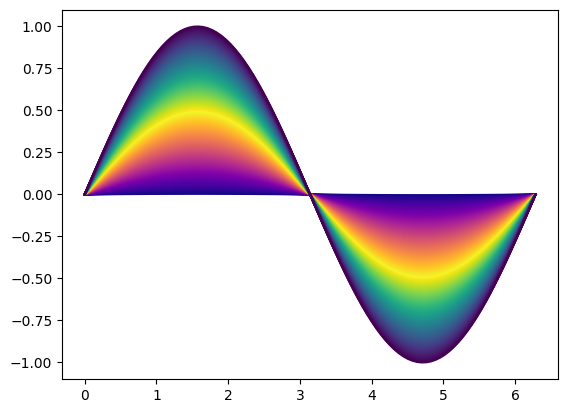

In [8]:
import matplotlib.pyplot as plt
import numpy as np

N = 256
x = np.linspace(0, 2 * np.pi, 100)

top = plt.get_cmap("plasma", N // 2)
bottom = plt.get_cmap("viridis", N // 2)
colors = np.vstack((
    top(np.linspace(0, 1, N//2)),
    bottom(np.linspace(1, 0, N//2))
))

for i in range(N):
    plt.plot(x, (i+1)*np.sin(x) / N, color=colors[i])
plt.show()

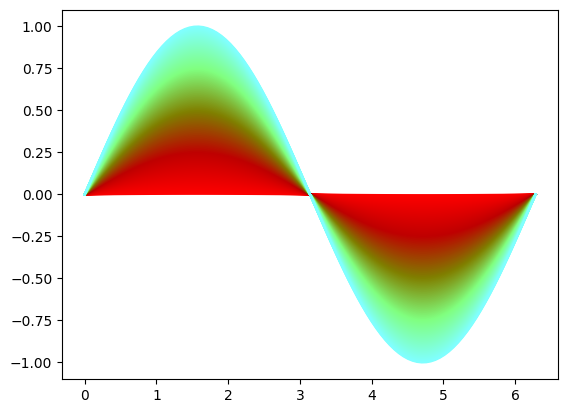

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LinearSegmentedColormap

cdict = {
    'red': [
        [0.0,  1.0, 1.0],
        [0.5,  0.5, 0.5],
        [1.0,  0.5, 0.5]
    ],
    'green': [
        [0.0,  0.0, 0.0],
        [0.25, 0.0, 0.0],
        [0.75, 1.0, 1.0],
        [1.0,  1.0, 1.0]
    ],
    'blue': [
        [0.0,  0.0, 0.0],
        [0.5,  0.0, 0.0],
        [1.0,  1.0, 1.0]
    ]
}

N = 256
x = np.linspace(0, 2 * np.pi, 100)

cmap = LinearSegmentedColormap("MyCMap", segmentdata=cdict, N=N)

for i in range(N):
    plt.plot(x, (i+1)*np.sin(x) / N, color=cmap(i))
plt.show()

## Ticks

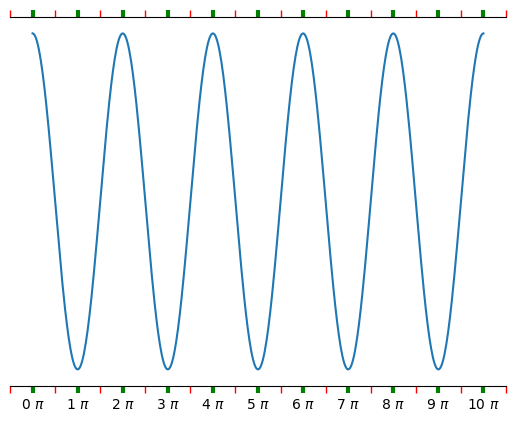

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

x = np.linspace(0, 10, 500)
plt.plot(x, np.cos(x * np.pi))

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter('{x:.0f} $\pi$')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_ticks_position('both')

ax.tick_params(axis='x', which="minor", width=1, length=5, color="r")
ax.tick_params(axis='x', which="major", width=3, length=5, color="g")

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Imshow

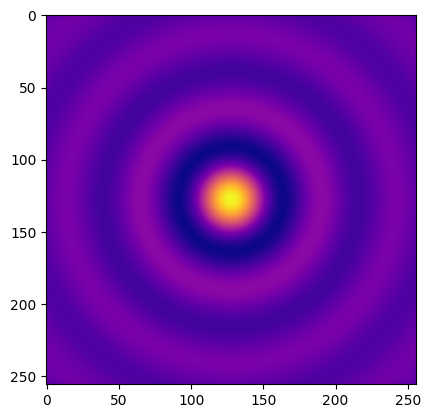

In [11]:
import matplotlib.pyplot as plt
import numpy as np

SIZE = 256

x = np.linspace(0, 10., SIZE) - 5
y = np.linspace(0, 10., SIZE) - 5

xx, yy = np.meshgrid(x, y)
rr = np.sqrt(xx**2 + yy**2)
z = np.where(rr > 0, np.sin(np.pi * rr) / (np.pi * rr), 1.0)

plt.imshow(z, cmap="plasma")


## Ukázky grafů různých typů

### Scatterplot

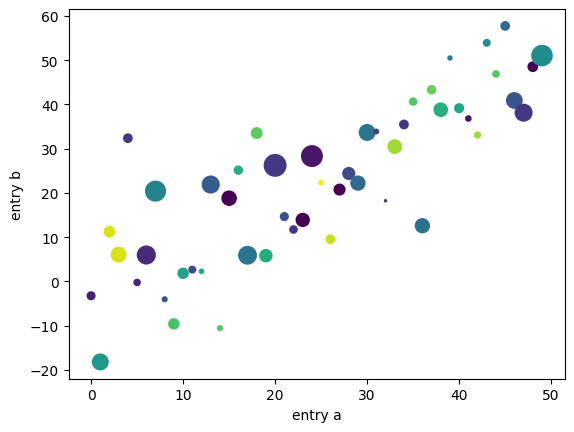

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)

plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Categorical plotting

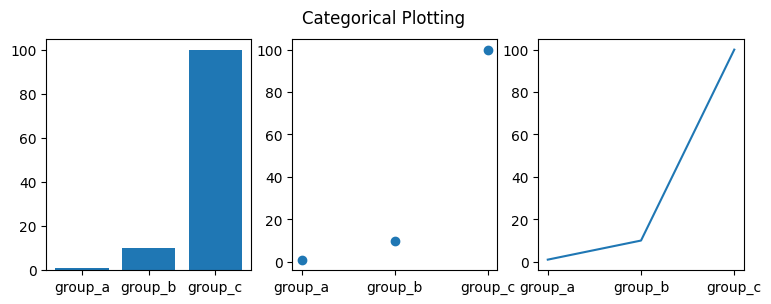

In [13]:
import matplotlib.pyplot as plt
import numpy as np

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### Barplot

Text(0, 0.5, 'hlasy (tis.)')

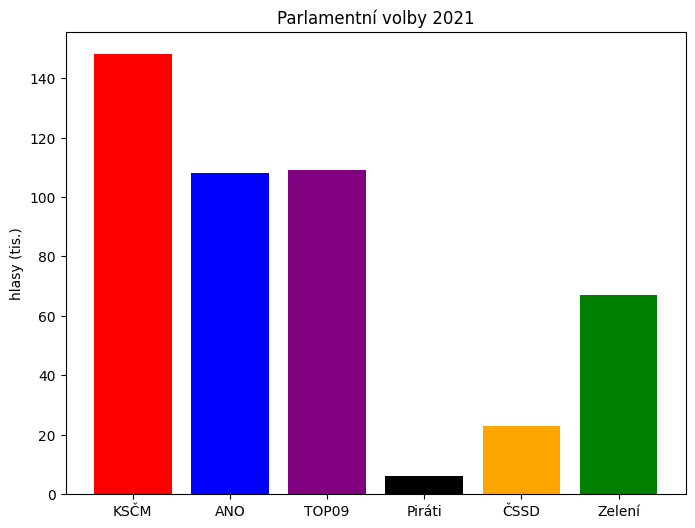

In [14]:
import matplotlib.pyplot as plt
import numpy as np

strany = ["KSČM", "ANO", "TOP09", "Piráti", "ČSSD", "Zelení"]
barvy = ["red", "blue", "purple", "black", "orange", "green"]

np.random.seed(19680801)
hlasy = np.random.randint(0,150, len(strany))

plt.figure(figsize=(8,6))
plt.bar(strany, hlasy, color = barvy)
plt.title("Parlamentní volby 2021")
plt.ylabel("hlasy (tis.)")

### Boxplot

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

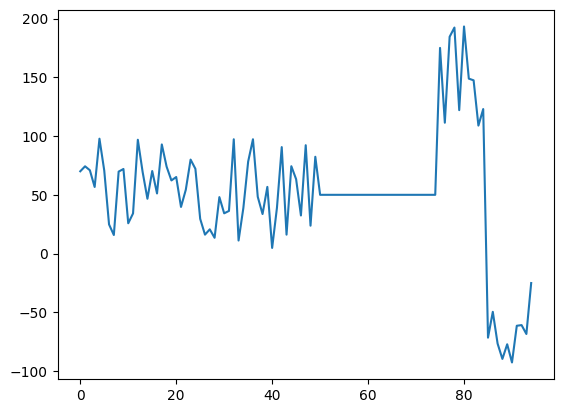

In [16]:
plt.plot(data)
plt.show()

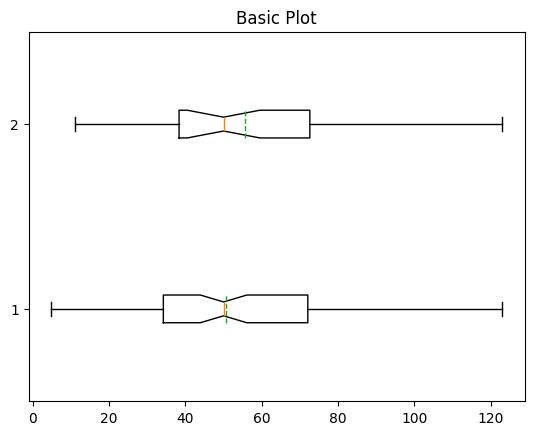

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots()

ax1.set_title('Basic Plot')
ax1.boxplot(
    [data, data[::3]],
    vert=False,
    notch=True,
    showfliers=False,
    meanline=True,
    showmeans=True
)

plt.show()

### Histogram

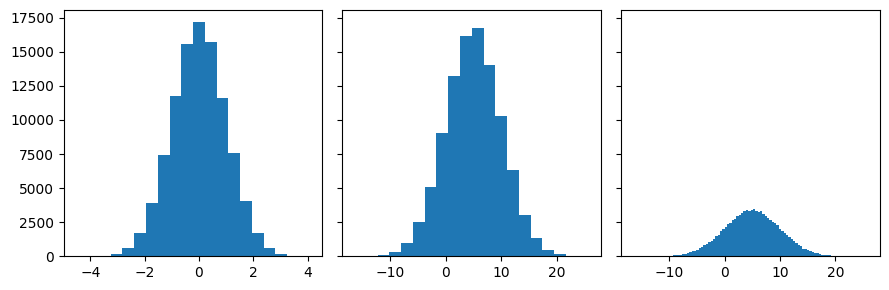

In [18]:
import matplotlib.pyplot as plt
import numpy as np

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = 5*np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)
axs[2].hist(y, bins=100)
plt.show()